In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')

## 1. Load Data

In [3]:
rp = pd.read_csv("ravenpack_all.csv",encoding = 'unicode_escape')

In [4]:
entity_id = rp.RP_ENTITY_ID.unique()

In [5]:
with open('readme.txt', 'w') as f:
    f.write('\n'.join(entity_id))

Submit a query to Ravenpack database to get the mapping file

In [6]:
rp_map = pd.read_csv("ravenpack_map.csv",encoding = 'unicode_escape')

In [7]:
ticker = rp_map[rp_map['DATA_TYPE'] == "TICKER"].DATA_VALUE.unique()

In [8]:
with open('readme2.txt', 'w') as f:
    f.write('\n'.join(ticker))

Submit a query to CRSP database to get stock price

In [9]:
crsp = pd.read_csv("crsp.csv",encoding = 'unicode_escape')

## 2. Data Preprocessing

(1) Get the price dataframe, with index = date, columns = ticker

In [10]:
price = crsp.copy()

In [11]:
price = price[['date','TICKER','PRC']]

In [12]:
price['date'] = pd.to_datetime(price['date'],format='%Y%m%d')

In [13]:
price = price[price['TICKER'].notna()]

In [14]:
price = price.pivot_table(index = 'date', columns = 'TICKER', values = 'PRC')

In [15]:
price

TICKER,AABA,AAC,AACG,AAIC,AAL,AAUK,ABB,ABEV,ABG,ABGB,...,YZC,ZA,ZEAL,ZEN,ZMX,ZNH,ZPIN,ZPLS,ZTO,ZX
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,4.5625,NaN,NaN,NaN,65.1250,NaN,NaN,5.56250,NaN,...,-14.1875,NaN,NaN,NaN,9.125,10.6875,NaN,NaN,NaN,NaN
2000-01-04,NaN,4.4375,NaN,NaN,NaN,64.0625,NaN,NaN,5.75000,NaN,...,14.0000,NaN,NaN,NaN,9.125,10.8125,NaN,NaN,NaN,NaN
2000-01-05,NaN,4.4375,NaN,NaN,NaN,66.4375,NaN,NaN,-5.75000,NaN,...,14.0000,NaN,NaN,NaN,9.125,10.5000,NaN,NaN,NaN,NaN
2000-01-06,NaN,4.5000,NaN,NaN,NaN,67.6875,NaN,NaN,5.62500,NaN,...,13.1250,NaN,NaN,NaN,9.250,10.7500,NaN,NaN,NaN,NaN
2000-01-07,NaN,4.5625,NaN,NaN,NaN,70.6250,NaN,NaN,-5.68750,NaN,...,14.3750,NaN,NaN,NaN,9.500,10.8750,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-25,NaN,9.7200,1.72,3.44,16.46,NaN,35.28,2.79,166.85001,NaN,...,NaN,NaN,18.6780,93.72,NaN,32.9300,NaN,NaN,29.49,NaN
2022-01-26,NaN,9.7100,1.68,3.39,16.24,NaN,35.25,2.75,158.57001,NaN,...,NaN,NaN,18.7079,92.03,NaN,32.1000,NaN,NaN,28.75,NaN
2022-01-27,NaN,9.7150,1.54,3.31,15.78,NaN,34.54,2.83,154.94000,NaN,...,NaN,NaN,-18.6250,90.52,NaN,31.8600,NaN,NaN,27.99,NaN


string for SIC code

In [16]:
SIC_CODE = pd.read_excel('SIC code meaning.xlsx')
SIC_CODE.head()

,SIC Code,Office,Industry Title
0,100,Office of Life Sciences,AGRICULTURAL PRODUCTION-CROPS
1,200,Office of Life Sciences,AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES
2,700,Office of Life Sciences,AGRICULTURAL SERVICES
3,800,Office of Life Sciences,FORESTRY
4,900,Office of Life Sciences,"FISHING, HUNTING AND TRAPPING"


In [61]:
returns['RET'][2].isalpha()

False

In [64]:
def string_filter(x):
    if str(x).isalpha():
        return False
    else:
        return True

In [65]:
returns = crsp[['date','TICKER','RET', 'SICCD']].copy()
returns = returns.merge(SIC_CODE, how = 'left', left_on='SICCD', right_on='SIC Code')
returns.drop(['Office', 'SICCD'], axis = 1, inplace = True)
returns.dropna(axis=0, inplace=True)
returns = returns[returns['RET'].apply(string_filter)]
returns['RET'] = returns['RET'].astype(float)
returns.head()

,date,TICKER,RET,SIC Code,Industry Title
0,20000103,HON,-0.017335,3714.0,MOTOR VEHICLE PARTS & ACCESSORIES
1,20000104,HON,-0.017641,3714.0,MOTOR VEHICLE PARTS & ACCESSORIES
2,20000105,HON,-0.013468,3714.0,MOTOR VEHICLE PARTS & ACCESSORIES
3,20000106,HON,0.019340,3714.0,MOTOR VEHICLE PARTS & ACCESSORIES
4,20000107,HON,0.053571,3714.0,MOTOR VEHICLE PARTS & ACCESSORIES


Text(0.5, 1.0, 'Return')

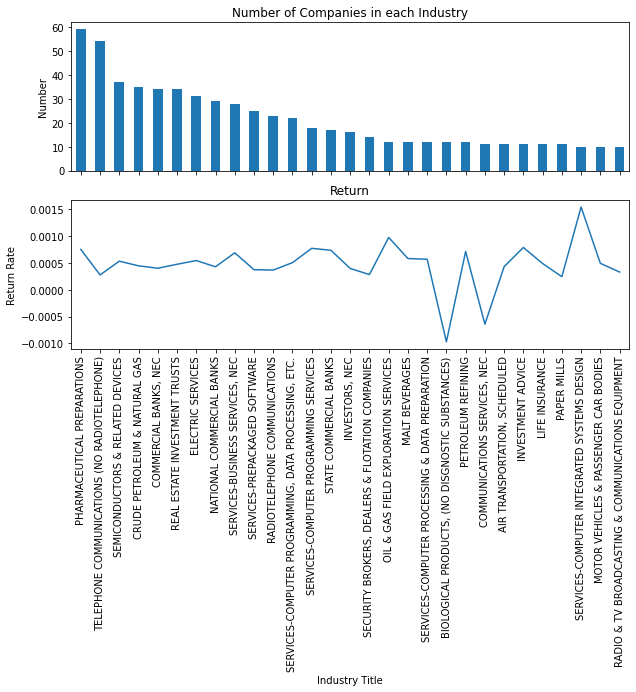

In [81]:
sector_info = returns.groupby('Industry Title').agg({'TICKER':'nunique', 'RET':'mean'}).sort_values('TICKER', ascending = False)
fig, ax = plt.subplots(2,1,sharex = True)
sector_info[sector_info['TICKER'] >= 10]['TICKER'].plot(kind = 'bar', figsize=(10,6), ax = ax[0])
ax[0].set_ylabel('Number')
ax[0].set_title('Number of Companies in each Industry')
sector_info[sector_info['TICKER'] >= 10]['RET'].plot(figsize=(10,6), ax = ax[1])
plt.xticks(rotation = 90)
ax[1].set_ylabel('Return Rate')
ax[1].set_title('Return')


(2) group return by country and sector(SIC code)

In [19]:
ticker_entity_id = rp_map[rp_map['DATA_TYPE'] == "TICKER"].RP_ENTITY_ID.unique()

In [20]:
use_rp = rp[rp['RP_ENTITY_ID'].isin(ticker_entity_id)].copy()

In [22]:
comp_tickers = rp_map[rp_map['DATA_TYPE'] == "TICKER"][['RP_ENTITY_ID','DATA_VALUE']].groupby('RP_ENTITY_ID', as_index = False).last()
full_data = use_rp.merge(comp_tickers, how = 'left')#.merge(returns, left_on='DATA_VALUE', right_on='TICKER', how = 'inner')
full_data.head()

,TIMESTAMP_UTC,RPNA_DATE_UTC,RPNA_TIME_UTC,RP_ENTITY_ID,ENTITY_TYPE,ENTITY_NAME,POSITION_NAME,RP_POSITION_ID,COUNTRY_CODE,RELEVANCE,...,NIP,PEQ,BEE,BMQ,BAM,BCA,BER,ANL_CHG,MCQ,DATA_VALUE
0,2000-01-03 18:45:23.000,20000103,18:45:23.000,0119FA,COMP,BT Group PLC,NaN,NaN,GB,90,...,51,50,50,100,50,100,100,50,100,U.BT
1,2000-01-05 11:07:00.000,20000105,11:07:00.000,0119FA,COMP,BT Group PLC,NaN,NaN,GB,90,...,36,50,50,100,50,50,50,50,100,U.BT
2,2000-01-05 12:04:39.000,20000105,12:04:39.000,0119FA,COMP,BT Group PLC,NaN,NaN,GB,92,...,39,50,50,100,50,50,50,50,100,U.BT
3,2000-01-05 12:26:06.000,20000105,12:26:06.000,0119FA,COMP,BT Group PLC,NaN,NaN,GB,92,...,39,50,50,100,50,50,50,50,100,U.BT
4,2000-01-06 05:00:00.000,20000106,05:00:00.000,0119FA,COMP,BT Group PLC,NaN,NaN,GB,53,...,41,0,50,50,50,50,0,50,50,U.BT


In [91]:
use_ticker = full_data[['DATA_VALUE', 'COUNTRY_CODE']].groupby('DATA_VALUE', as_index=False).last()
country_info = returns.merge(use_ticker, left_on='TICKER', right_on='DATA_VALUE', how = 'inner')\
    .groupby(['COUNTRY_CODE'])\
    .agg({'DATA_VALUE': 'nunique','RET':'mean'})\
    .sort_values('DATA_VALUE', ascending = False)
country_info.rename(columns={'DATA_VALUE':'TICKER'}, inplace = True)
country_info

,TICKER,RET
COUNTRY_CODE,,
KY,39,0.000635
CN,10,0.000800
MX,6,0.000563
KR,5,0.000596
FR,5,0.000813
GB,5,0.000323
DE,4,-0.000070
JP,4,0.000168
AR,3,0.000284


Text(0.5, 1.0, 'Return')

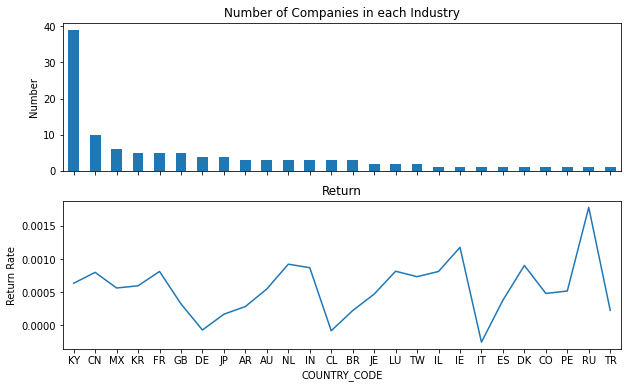

In [94]:
fig, ax = plt.subplots(2,1,sharex = True)
country_info['TICKER'].plot(kind = 'bar', figsize=(10,6), ax = ax[0])
ax[0].set_ylabel('Number')
ax[0].set_title('Number of Companies in each Industry')
country_info['RET'].plot(figsize=(10,6), ax = ax[1])
ax[1].set_ylabel('Return Rate')
ax[1].set_title('Return')

In [95]:
full_info = returns.merge(use_ticker, left_on='TICKER', right_on='DATA_VALUE', how = 'inner')
full_info

,date,TICKER,RET,SIC Code,Industry Title,DATA_VALUE,COUNTRY_CODE
0,20020503,CRTO,0.021064,3670.0,ELECTRONIC COMPONENTS & ACCESSORIES,CRTO,FR
1,20020506,CRTO,0.009772,3670.0,ELECTRONIC COMPONENTS & ACCESSORIES,CRTO,FR
2,20020507,CRTO,-0.016129,3670.0,ELECTRONIC COMPONENTS & ACCESSORIES,CRTO,FR
3,20020508,CRTO,0.002186,3670.0,ELECTRONIC COMPONENTS & ACCESSORIES,CRTO,FR
4,20020509,CRTO,-0.016358,3670.0,ELECTRONIC COMPONENTS & ACCESSORIES,CRTO,FR
...,...,...,...,...,...,...,...
286501,20220125,CCM,-0.009852,8011.0,SERVICES-OFFICES & CLINICS OF DOCTORS OF MEDICINE,CCM,KY
286502,20220126,CCM,0.039701,8011.0,SERVICES-OFFICES & CLINICS OF DOCTORS OF MEDICINE,CCM,KY
286503,20220127,CCM,-0.014260,8011.0,SERVICES-OFFICES & CLINICS OF DOCTORS OF MEDICINE,CCM,KY
286504,20220128,CCM,-0.106796,8011.0,SERVICES-OFFICES & CLINICS OF DOCTORS OF MEDICINE,CCM,KY
